# U16 financial features analysis

## 拿取資料

In [3]:
#%matplotlib
#import matplotlib.pyplot as plt
#plt.figure()
#plt.plot([1,2,3])..

In [1]:
from finlab.data import Data
from finlab.ml import fundamental_features
fdf = fundamental_features()


data = Data()

rev = data.get("當月營收")
close = data.get("收盤價")
open_ = data.get("開盤價")
high = data.get("最高價")
low = data.get("最低價")
vol = data.get("成交股數")

#財務指標
PB = data.get("股價淨值比")
pe = data.get("本益比")

rev = data.get("當月營收")
l_rev = data.get("去年當月營收")

bargin_i=data.get("投信買賣超股數")
bargin_f=data.get("外資自營商買賣超股數")
bargin_s=data.get("自營商買賣超股數(自行買賣)")


rev.index = rev.index.shift(5, "d")

D:\ProgramData\Miniconda3\envs\finlab\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


<AxesSubplot:xlabel='date'>

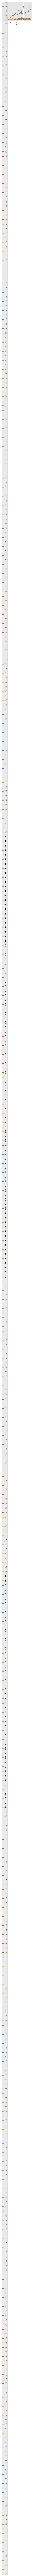

In [5]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

rev.plot()

D:\ProgramData\Miniconda3\envs\finlab\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


<AxesSubplot:xlabel='date'>

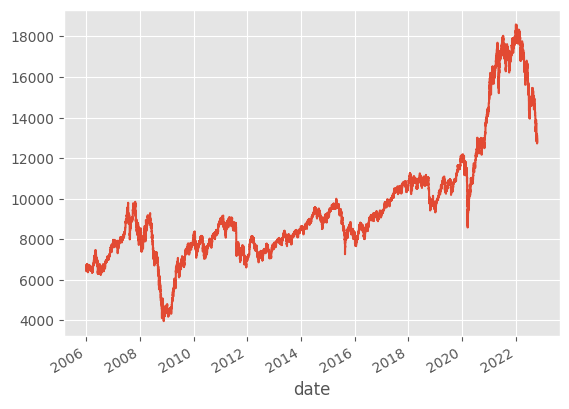

In [1]:
from finlab.data import Data

data = Data()

twii = data.get('發行量加權股價指數')
twii = twii['台股指數']
twii = twii[(twii.index.minute % 15 == 0)  & (twii.index.second == 0)]

import matplotlib.pyplot as plt
plt.style.use("ggplot")

twii.plot()

## 製作features

In [44]:
import talib
import numpy as np
import pandas as pd

sma = talib.SMA(twii, timeperiod=120)
wma = talib.WMA(twii, timeperiod=120)
mom = talib.MOM(twii, timeperiod=120)
k, d = talib.STOCH  (twii, twii, twii, fastk_period=120, slowk_period=60, slowd_period=60)
k2, d2 = talib.STOCH(twii, twii, twii, fastk_period=240, slowk_period=120, slowd_period=120)
k3, d3 = talib.STOCH(twii, twii, twii, fastk_period=360, slowk_period=180, slowd_period=180)
k4, d4 = talib.STOCH(twii, twii, twii, fastk_period=480, slowk_period=240, slowd_period=240)
k5, d5 = talib.STOCH(twii, twii, twii, fastk_period=640, slowk_period=320, slowd_period=320)
k6, d6 = talib.STOCH(twii, twii, twii, fastk_period=720, slowk_period=360, slowd_period=360)
k7, d7 = talib.STOCH(twii, twii, twii, fastk_period=840, slowk_period=420, slowd_period=420)
k8, d8 = talib.STOCH(twii, twii, twii, fastk_period=960, slowk_period=480, slowd_period=480)

rsi = talib.RSI (twii, timeperiod=120)
rsi2 = talib.RSI(twii, timeperiod=240)
rsi3 = talib.RSI(twii, timeperiod=480)
rsi4 = talib.RSI(twii, timeperiod=640)
rsi5 = talib.RSI(twii, timeperiod=720)
rsi6 = talib.RSI(twii, timeperiod=840)

macd1, macd2, macd3 = talib.MACD(twii, fastperiod=120, slowperiod=60, signalperiod=60)
willr = talib.WILLR(twii, twii, twii, timeperiod=120)
cci = talib.CCI(twii, twii, twii, timeperiod=120)

dataset = pd.DataFrame({
    'RSIb': rsi / 50,
    'RSIb2': rsi2 / 50,
    'RSIb3': rsi3 / 50,
    'RSIb4': rsi4 / 50,
    'RSIb5': rsi5 / 50,
    'RSIb6': rsi6 / 50,
    'MOMb': mom - 0,
    'KDb': k - d,
    'KDb2': k2 - d2,
    'KDb3': k3 - d3,
    'KDb4': k4 - d4,
    'KDb5': k5 - d5,
    'KDb6': k6 - d6,
    'KDb7': k7 - d7,
    'KDb8': k8 - d8,
    
    'a5':   (twii.rolling(5).mean()   / twii),
    'a10':  (twii.rolling(10).mean()  / twii),
    'a20':  (twii.rolling(20).mean()  / twii),
    'a40':  (twii.rolling(40).mean()  / twii),
    'a80':  (twii.rolling(80).mean()  / twii),
    'a160': (twii.rolling(160).mean() / twii),
    'a320': (twii.rolling(320).mean() / twii),
    'a640': (twii.rolling(640).mean() / twii),
    'a720': (twii.rolling(720).mean() / twii),
    'a840': (twii.rolling(840).mean() / twii),
    'a960': (twii.rolling(960).mean() / twii),
    'a1024':(twii.rolling(1024).mean() / twii),
    'b1': twii/twii.shift(50),
    'b2': twii/twii.shift(100),
    'b3': twii/twii.shift(150),
    'b4': twii/twii.shift(200),
    'b5': twii/twii.shift(250),
    'b6': twii/twii.shift(300),
    'b7': twii/twii.shift(350),
    'LINEARREG_SLOPE0': talib.LINEARREG_SLOPE(twii, 60),
    'LINEARREG_SLOPE1': talib.LINEARREG_SLOPE(twii, 120),

    'ADXR0': talib.ADXR(twii, twii, twii, 60),
    'ADXR1': talib.ADXR(twii, twii, twii, 120),
    'ADXR2': talib.ADXR(twii, twii, twii, 240),
    'ADXR3': talib.ADXR(twii, twii, twii, 360),
    'ADXR4': talib.ADXR(twii, twii, twii, 480),
    'ADXR5': talib.ADXR(twii, twii, twii, 640),

#    'ATR5': talib.ATR(twii, twii, twii, 5),
#    'ATR10': talib.ATR(twii, twii, twii, 10),
#    'ATR20': talib.ATR(twii, twii, twii, 20),
#    'ATR30': talib.ATR(twii, twii, twii, 30),
#    'ATR420': talib.ATR(twii, twii, twii, 420),    
    
    
    'return': twii.shift(-10) / twii ,#>1,
})

feature_names = list(dataset.columns[:-1])

In [3]:
#dataset.tail()

In [163]:
###大量篩，再去上面手動微調
import talib
import numpy as np
import pandas as pd

import finlab.ml as ml

twii_df = pd.DataFrame({
    'open':twii,
    'high':twii,
    'low':twii,
    'close':twii,
})
indicators = ['CDLTRISTAR','STOCH' , 'RSI','STOCHRSI','ULTOSC','WILLR','LINEARREG_SLOPE','TSF','ROCR100','MINUS_DI','MACD','CCI','AROONOSC','AVGPRICE','ATR','NATR','TRANGE','MA','SMA'] # ,'TEMA' ,'PPO','ROCP'
multiplier = [1,5,10,20,50]

dataset = ml.talib_features(twii_df, indicators,multiplier)
feature_names =  dataset.columns

dataset['return'] = (twii.shift(-10)  / twii) #>1

In [165]:
rsi = talib.RSI(twii)

%matplotlib inline
rsi.plot()

TypeError: CDLTRISTAR() takes exactly 4 positional arguments (1 given)

## 訓練

In [166]:
import lightgbm as lgb

dataset_train = dataset[:'2020']
dataset_test = dataset['2021':]

train = dataset_train[feature_names], dataset_train['return']  >1.
test = dataset_test[feature_names], dataset_test['return'] >1

gbm = lgb.LGBMClassifier(colsample_bytree=0.6320148430111057, metric='None',
                         min_child_samples=467, min_child_weight=10.0, n_estimators=5000,
                         n_jobs=4, num_leaves=7, random_state=314, reg_alpha=100,
                         reg_lambda=20, subsample=0.5546887938364559)
                          #n_estimators=1000, random_state=5, learning_rate=0.05)
gbm.fit(*train)
gbm.score(*test)

0.5312200956937799

In [167]:
###全部都做多，勝率是多少。和學習後的成績比比看
###要找找看哪些指標是重要的
(dataset_test['return']).sum() / len(dataset_test)

0.9986690005475789

## 測試哪些feature重要

<AxesSubplot:xlabel='Value', ylabel='Feature'>

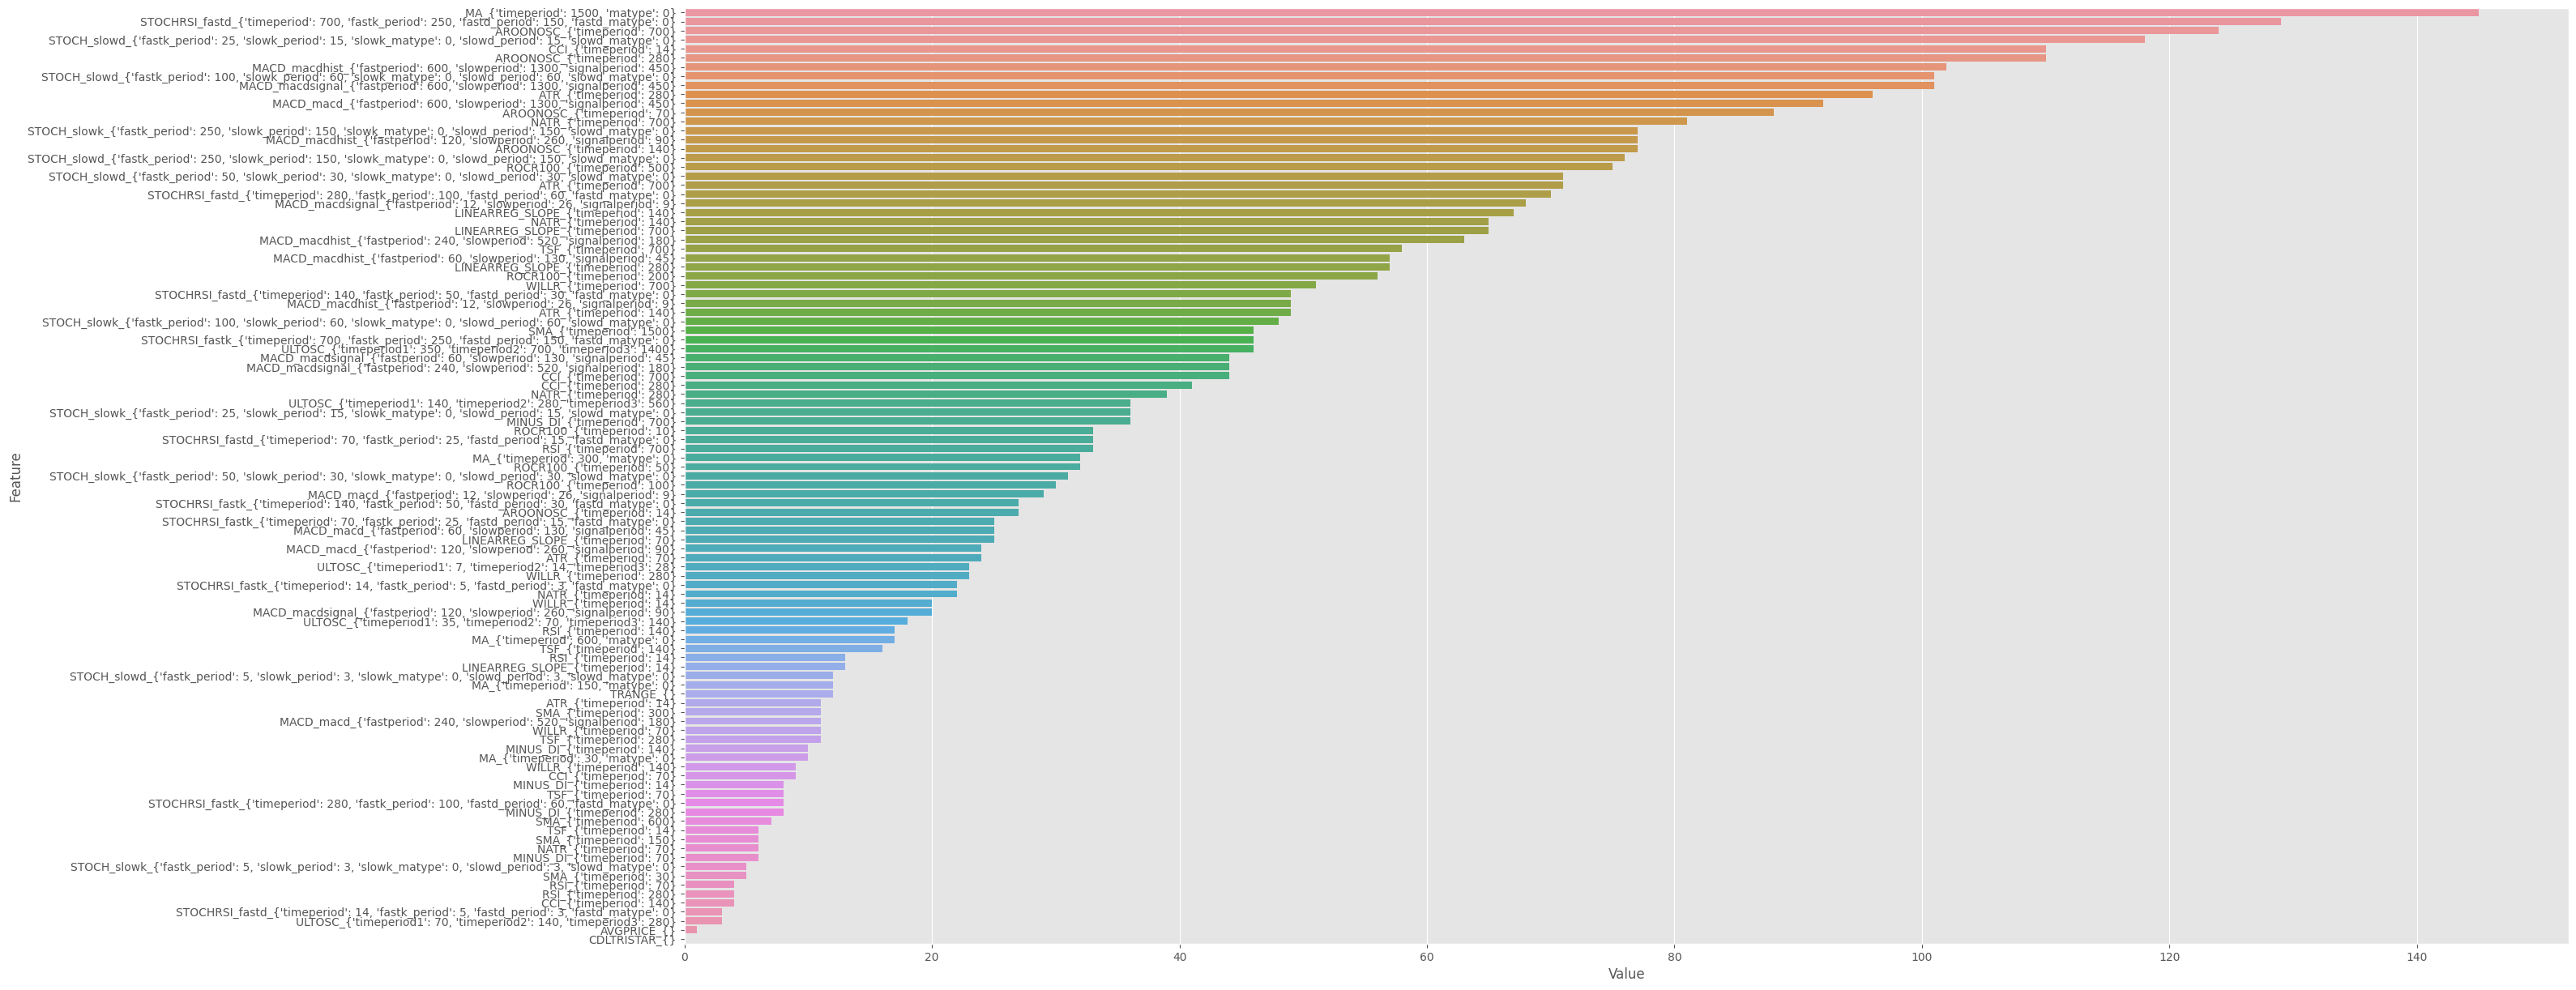

In [168]:
feature_imp = pd.DataFrame(sorted(zip(gbm.feature_importances_,feature_names)), columns=['Value','Feature'])
feature_imp

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20*1.5, 10*1.5))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))


## 回測一下

<AxesSubplot:xlabel='date'>

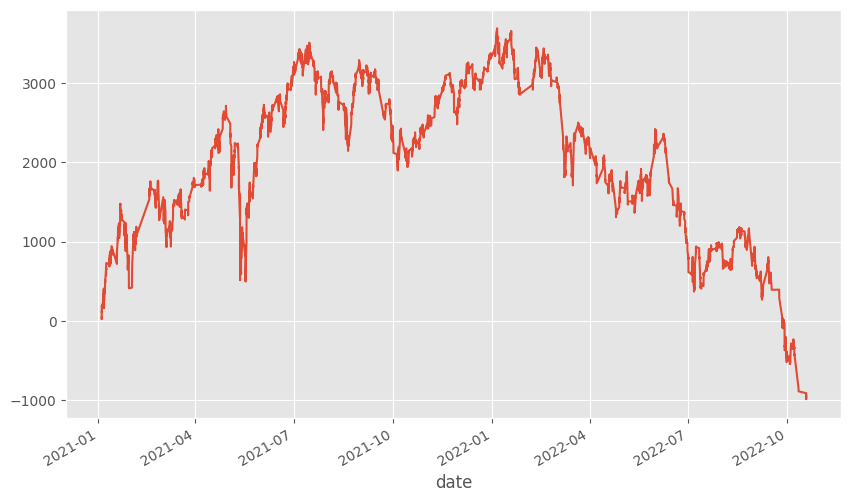

In [135]:
ey = gbm.predict_proba(dataset[feature_names])
#print(ey) #[失敗率,成功率]，從成功率看出他有多少的信心
ey = pd.Series(ey.swapaxes(0,1)[1], index=dataset.index)

#ey.hist()

eq = twii[dataset.index]
gain = ((eq.shift(-1) - eq))

signal = (ey > ey.quantile(0.5)).rolling(10).sum() > 0
eq = (gain[signal]['2021':]).cumsum() #cumsum()=累加
eq.plot()

## 手續費+滑價

In [136]:
signal['2022':].astype(int).diff().abs().sum() #還沒算滑價喔

81.0

<AxesSubplot:>

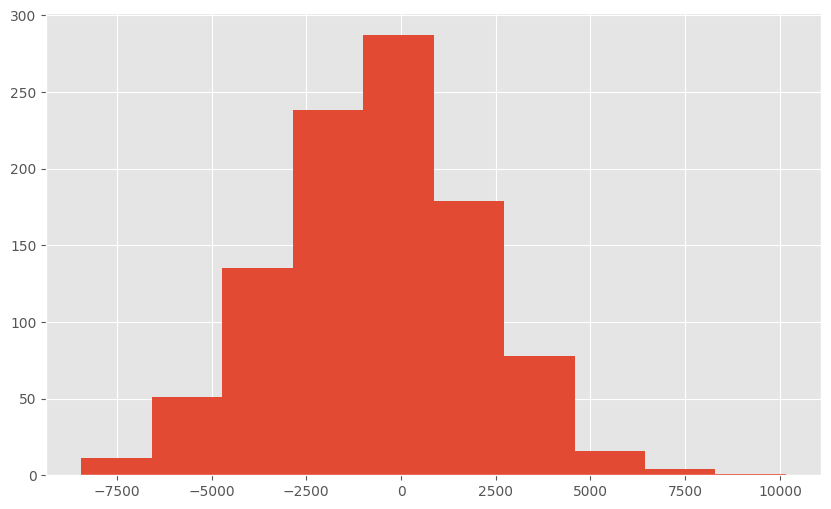

In [137]:
#%matplotlib widget

hold_count = signal['2021'].sum()
import numpy as np

samples = []
for i in range(1000):
    ret = (np.random.choice(gain[signal]['2021':].dropna(),hold_count).sum())
    samples.append(ret)

#samples    
pd.Series(samples).hist()

# U17 Model Interpretation

## Recall and Precision

<AxesSubplot:>

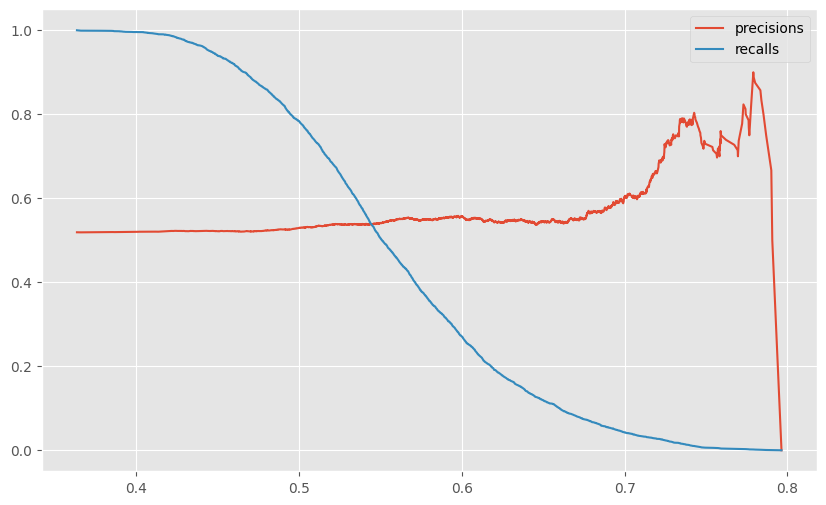

In [138]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(dataset['return']['2021':] >1 , ey['2021':])

pd.DataFrame({
    'precisions':precisions[:-1],
    'recalls':recalls[:-1],
}, index=thresholds).plot()

In [139]:
len(dataset['return']['2016':])

31616

## ROC Curve

(4182,)
(4182,)
(4182,)


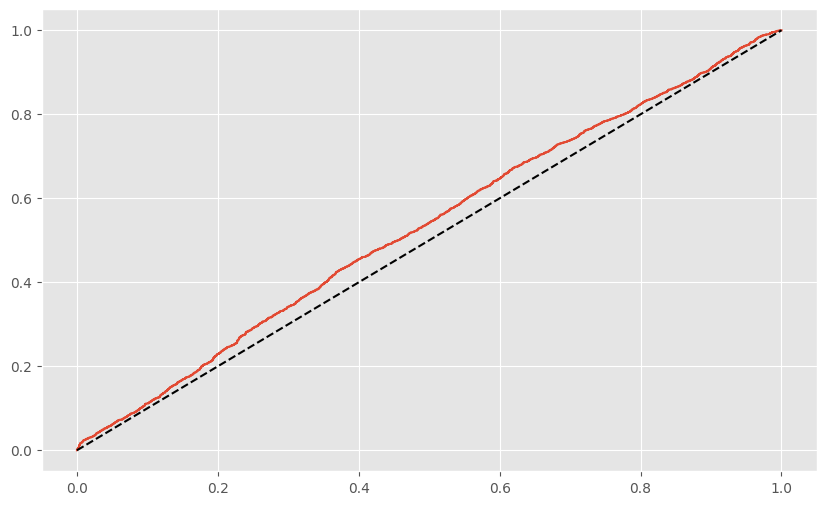

In [140]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(dataset['return']['2021':]>1, ey['2021':])
#precision , recall , thresholds(分辨Ture和False的門檻調整)
print(fpr.shape)
print(tpr.shape)
print(thresholds.shape)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')

### 使用 eli5 察看機器學習如何做決定

In [141]:
import eli5

eli5.explain_prediction_lightgbm(gbm, dataset[feature_names].iloc[100])

Explanation(estimator="LGBMClassifier(colsample_bytree=0.6320148430111057, metric='None',\n               min_child_samples=467, min_child_weight=10.0, n_estimators=5000,\n               n_jobs=4, num_leaves=7, random_state=314, reg_alpha=100,\n               reg_lambda=20, subsample=0.5546887938364559)", description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble. Each leaf has an output score, and expected scores can also be\nassigned to parent nodes. Contribution of one feature on the decision path\nis how much expected score changes from parent to child. Weights of all \nfeatures sum to the output score of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision paths', is_regression=False, targets=[TargetExplanation(target=True, feature_weights=FeatureWeights(pos=[FeatureWeight(feature="STOCH_slowd_{'fastk_period': 100, 'slowk_period': 60, 'slowk_matype': 0, 'slowd_period': 60, 'slowd_matype': 0}", weight=0.1277870840644278, std=None, value=nan), FeatureWeight(feature='<BIAS>', weight=0.10993770953560256, std=None, value=1.0), FeatureWeight(feature="STOCHRSI_fastd_{'timeperiod': 70, 'fastk_period': 25, 'fastd_period': 15, 'fastd_matype': 0}", weight=0.10899988443246054, std=None, value=nan), FeatureWeight(feature="STOCH_slowd_{'fastk_period': 50, 'slowk_period': 30, 'slowk_matype': 0, 'slowd_period': 30, 'slowd_matype': 0}", weight=0.09544803112024264, std=None, value=nan), FeatureWeight(feature="MA_{'timeperiod': 1500, 'matype': 0}", weight=0.08987306469627968, std=None, value=nan), FeatureWeight(feature="MACD_macdhist_{'fastperiod': 120, 'slowperiod': 260, 'signalperiod': 90}", weight=0.07194962430622581, std=None, value=nan), FeatureWeight(feature="WILLR_{'timeperiod': 70}", weight=0.06724432437369914, std=None, value=-2.0870059709980464), FeatureWeight(feature="STOCHRSI_fastk_{'timeperiod': 70, 'fastk_period': 25, 'fastd_period': 15, 'fastd_matype': 0}", weight=0.05597843404324995, std=None, value=nan), FeatureWeight(feature="SMA_{'timeperiod': 1500}", weight=0.05445756063247825, std=None, value=nan), FeatureWeight(feature="STOCH_slowk_{'fastk_period': 50, 'slowk_period': 30, 'slowk_matype': 0, 'slowd_period': 30, 'slowd_matype': 0}", weight=0.05308019224982409, std=None, value=nan), FeatureWeight(feature="STOCH_slowd_{'fastk_period': 25, 'slowk_period': 15, 'slowk_matype': 0, 'slowd_period': 15, 'slowd_matype': 0}", weight=0.05110498940011838, std=None, value=53.51159317246446), FeatureWeight(feature="ATR_{'timeperiod': 700}", weight=0.04553561374557877, std=None, value=nan), FeatureWeight(feature="LINEARREG_SLOPE_{'timeperiod': 700}", weight=0.04511379806920418, std=None, value=nan), FeatureWeight(feature="LINEARREG_SLOPE_{'timeperiod': 140}", weight=0.0449710418214747, std=None, value=nan), FeatureWeight(feature="LINEARREG_SLOPE_{'timeperiod': 70}", weight=0.04481311524865183, std=None, value=2.0984703000611415), FeatureWeight(feature="STOCH_slowk_{'fastk_period': 250, 'slowk_period': 150, 'slowk_matype': 0, 'slowd_period': 150, 'slowd_matype': 0}", weight=0.042286601143692704, std=None, value=nan), FeatureWeight(feature="ROCR100_{'timeperiod': 200}", weight=0.03762093823592573, std=None, value=nan), FeatureWeight(feature="MACD_macdhist_{'fastperiod': 600

### 使用Skater來察看機器學習如何做實驗

In [142]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel
# 新版的skater 不支援 dataset 中有 nan，必須先將有 nan 的 rows 移除喔！
dataset_train_dropna = dataset_train.dropna(how='any')


interpreter = Interpretation(training_data=dataset_train_dropna[feature_names].values[:1000],
                             feature_names=feature_names, training_labels=dataset_train_dropna['return'].values[:1000])
im_model = InMemoryModel(lambda x: gbm.predict_proba(x), examples=train[0],
                         target_names=['down', 'rise'])

2022-10-24 09:35:26,852 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False
2022-10-24 09:35:35,176 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


[102/102] features ████████████████████ Time elapsed: 36 seconds

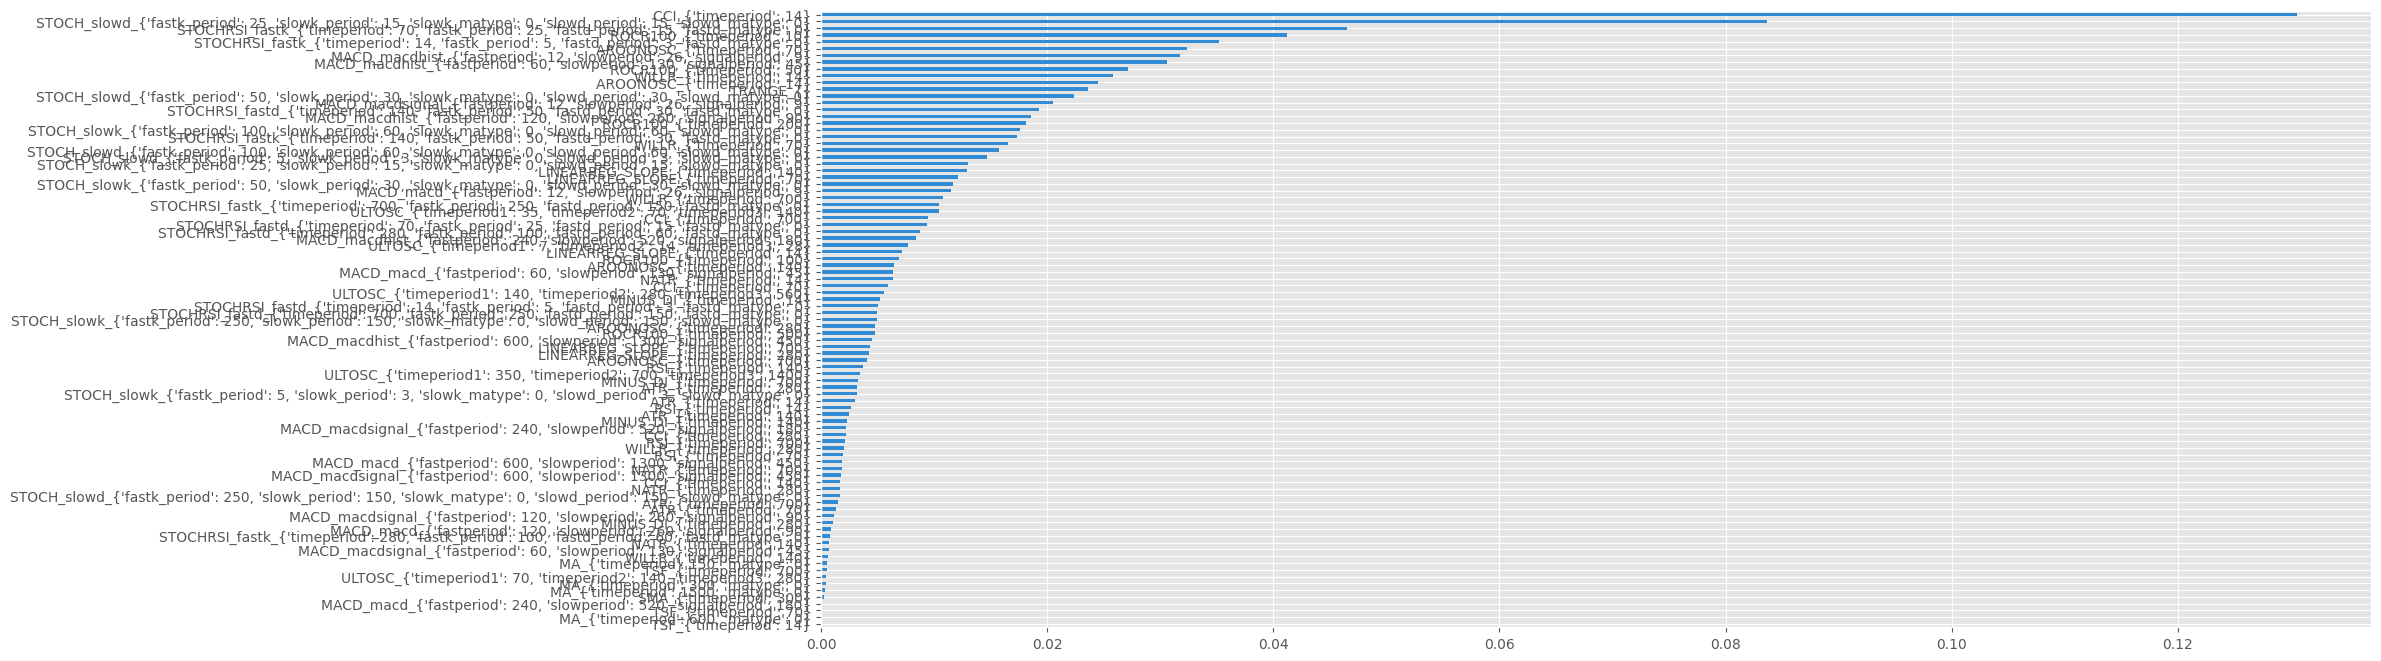

In [143]:
plt.rcParams['figure.figsize'] = (10, 6)
plots = interpreter.feature_importance.plot_feature_importance(im_model, ascending=True)

#### 1. 挑幾項出來看

In [144]:
import warnings
warnings.filterwarnings('ignore') #忽略錯誤訊息

In [145]:
feature_names

Index(['STOCH_slowk_{'fastk_period': 5, 'slowk_period': 3, 'slowk_matype': 0, 'slowd_period': 3, 'slowd_matype': 0}',
       'STOCH_slowd_{'fastk_period': 5, 'slowk_period': 3, 'slowk_matype': 0, 'slowd_period': 3, 'slowd_matype': 0}',
       'STOCH_slowk_{'fastk_period': 25, 'slowk_period': 15, 'slowk_matype': 0, 'slowd_period': 15, 'slowd_matype': 0}',
       'STOCH_slowd_{'fastk_period': 25, 'slowk_period': 15, 'slowk_matype': 0, 'slowd_period': 15, 'slowd_matype': 0}',
       'STOCH_slowk_{'fastk_period': 50, 'slowk_period': 30, 'slowk_matype': 0, 'slowd_period': 30, 'slowd_matype': 0}',
       'STOCH_slowd_{'fastk_period': 50, 'slowk_period': 30, 'slowk_matype': 0, 'slowd_period': 30, 'slowd_matype': 0}',
       'STOCH_slowk_{'fastk_period': 100, 'slowk_period': 60, 'slowk_matype': 0, 'slowd_period': 60, 'slowd_matype': 0}',
       'STOCH_slowd_{'fastk_period': 100, 'slowk_period': 60, 'slowk_matype': 0, 'slowd_period': 60, 'slowd_matype': 0}',
       'STOCH_slowk_{'fastk_period':

In [146]:
#r = interpreter.partial_dependence.plot_partial_dependence(
#    [('a5', 'b1')],
#    im_model, grid_resolution=10, 
#    grid_range=(0,1), n_samples=1000, n_jobs=1,
#    with_variance=False, figsize = (6*2, 4*2), )

KeyError: 'Features [\'a5\', \'b1\'] not found in \nInterpretation.data_set.feature_ids \n["STOCH_slowk_{\'fastk_period\': 5, \'slowk_period\': 3, \'slowk_matype\': 0, \'slowd_period\': 3, \'slowd_matype\': 0}", "STOCH_slowd_{\'fastk_period\': 5, \'slowk_period\': 3, \'slowk_matype\': 0, \'slowd_period\': 3, \'slowd_matype\': 0}", "STOCH_slowk_{\'fastk_period\': 25, \'slowk_period\': 15, \'slowk_matype\': 0, \'slowd_period\': 15, \'slowd_matype\': 0}", "STOCH_slowd_{\'fastk_period\': 25, \'slowk_period\': 15, \'slowk_matype\': 0, \'slowd_period\': 15, \'slowd_matype\': 0}", "STOCH_slowk_{\'fastk_period\': 50, \'slowk_period\': 30, \'slowk_matype\': 0, \'slowd_period\': 30, \'slowd_matype\': 0}", "STOCH_slowd_{\'fastk_period\': 50, \'slowk_period\': 30, \'slowk_matype\': 0, \'slowd_period\': 30, \'slowd_matype\': 0}", "STOCH_slowk_{\'fastk_period\': 100, \'slowk_period\': 60, \'slowk_matype\': 0, \'slowd_period\': 60, \'slowd_matype\': 0}", "STOCH_slowd_{\'fastk_period\': 100, \'slowk_period\': 60, \'slowk_matype\': 0, \'slowd_period\': 60, \'slowd_matype\': 0}", "STOCH_slowk_{\'fastk_period\': 250, \'slowk_period\': 150, \'slowk_matype\': 0, \'slowd_period\': 150, \'slowd_matype\': 0}", "STOCH_slowd_{\'fastk_period\': 250, \'slowk_period\': 150, \'slowk_matype\': 0, \'slowd_period\': 150, \'slowd_matype\': 0}", "RSI_{\'timeperiod\': 14}", "RSI_{\'timeperiod\': 70}", "RSI_{\'timeperiod\': 140}", "RSI_{\'timeperiod\': 280}", "RSI_{\'timeperiod\': 700}", "STOCHRSI_fastk_{\'timeperiod\': 14, \'fastk_period\': 5, \'fastd_period\': 3, \'fastd_matype\': 0}", "STOCHRSI_fastd_{\'timeperiod\': 14, \'fastk_period\': 5, \'fastd_period\': 3, \'fastd_matype\': 0}", "STOCHRSI_fastk_{\'timeperiod\': 70, \'fastk_period\': 25, \'fastd_period\': 15, \'fastd_matype\': 0}", "STOCHRSI_fastd_{\'timeperiod\': 70, \'fastk_period\': 25, \'fastd_period\': 15, \'fastd_matype\': 0}", "STOCHRSI_fastk_{\'timeperiod\': 140, \'fastk_period\': 50, \'fastd_period\': 30, \'fastd_matype\': 0}", "STOCHRSI_fastd_{\'timeperiod\': 140, \'fastk_period\': 50, \'fastd_period\': 30, \'fastd_matype\': 0}", "STOCHRSI_fastk_{\'timeperiod\': 280, \'fastk_period\': 100, \'fastd_period\': 60, \'fastd_matype\': 0}", "STOCHRSI_fastd_{\'timeperiod\': 280, \'fastk_period\': 100, \'fastd_period\': 60, \'fastd_matype\': 0}", "STOCHRSI_fastk_{\'timeperiod\': 700, \'fastk_period\': 250, \'fastd_period\': 150, \'fastd_matype\': 0}", "STOCHRSI_fastd_{\'timeperiod\': 700, \'fastk_period\': 250, \'fastd_period\': 150, \'fastd_matype\': 0}", "ULTOSC_{\'timeperiod1\': 7, \'timeperiod2\': 14, \'timeperiod3\': 28}", "ULTOSC_{\'timeperiod1\': 35, \'timeperiod2\': 70, \'timeperiod3\': 140}", "ULTOSC_{\'timeperiod1\': 70, \'timeperiod2\': 140, \'timeperiod3\': 280}", "ULTOSC_{\'timeperiod1\': 140, \'timeperiod2\': 280, \'timeperiod3\': 560}", "ULTOSC_{\'timeperiod1\': 350, \'timeperiod2\': 700, \'timeperiod3\': 1400}", "WILLR_{\'timeperiod\': 14}", "WILLR_{\'timeperiod\': 70}", "WILLR_{\'timeperiod\': 140}", "WILLR_{\'timeperiod\': 280}", "WILLR_{\'timeperiod\': 700}", "LINEARREG_SLOPE_{\'timeperiod\': 14}", "LINEARREG_SLOPE_{\'timeperiod\': 70}", "LINEARREG_SLOPE_{\'timeperiod\': 140}", "LINEARREG_SLOPE_{\'timeperiod\': 280}", "LINEARREG_SLOPE_{\'timeperiod\': 700}", "TSF_{\'timeperiod\': 14}", "TSF_{\'timeperiod\': 70}", "TSF_{\'timeperiod\': 140}", "TSF_{\'timeperiod\': 280}", "TSF_{\'timeperiod\': 700}", "ROCR100_{\'timeperiod\': 10}", "ROCR100_{\'timeperiod\': 50}", "ROCR100_{\'timeperiod\': 100}", "ROCR100_{\'timeperiod\': 200}", "ROCR100_{\'timeperiod\': 500}", "MINUS_DI_{\'timeperiod\': 14}", "MINUS_DI_{\'timeperiod\': 70}", "MINUS_DI_{\'timeperiod\': 140}", "MINUS_DI_{\'timeperiod\': 280}", "MINUS_DI_{\'timeperiod\': 700}", "MACD_macd_{\'fastperiod\': 12, \'slowperiod\': 26, \'signalperiod\': 9}", "MACD_macdsignal_{\'fastperiod\': 12, \'slowperiod\': 26, \'signalperiod\': 9}", "MACD_macdhist_{\'fastperiod\': 12, \'slowperiod\': 26, \'signalperiod\': 9}", "MACD_macd_{\'fastperiod\': 60, \'slowperiod\': 130, \'signalperiod\': 45}", "MACD_macdsignal_{\'fastperiod\': 60, \'slowperiod\': 130, \'signalperiod\': 45}", "MACD_macdhist_{\'fastperiod\': 60, \'slowperiod\': 130, \'signalperiod\': 45}", "MACD_macd_{\'fastperiod\': 120, \'slowperiod\': 260, \'signalperiod\': 90}", "MACD_macdsignal_{\'fastperiod\': 120, \'slowperiod\': 260, \'signalperiod\': 90}", "MACD_macdhist_{\'fastperiod\': 120, \'slowperiod\': 260, \'signalperiod\': 90}", "MACD_macd_{\'fastperiod\': 240, \'slowperiod\': 520, \'signalperiod\': 180}", "MACD_macdsignal_{\'fastperiod\': 240, \'slowperiod\': 520, \'signalperiod\': 180}", "MACD_macdhist_{\'fastperiod\': 240, \'slowperiod\': 520, \'signalperiod\': 180}", "MACD_macd_{\'fastperiod\': 600, \'slowperiod\': 1300, \'signalperiod\': 450}", "MACD_macdsignal_{\'fastperiod\': 600, \'slowperiod\': 1300, \'signalperiod\': 450}", "MACD_macdhist_{\'fastperiod\': 600, \'slowperiod\': 1300, \'signalperiod\': 450}", "CCI_{\'timeperiod\': 14}", "CCI_{\'timeperiod\': 70}", "CCI_{\'timeperiod\': 140}", "CCI_{\'timeperiod\': 280}", "CCI_{\'timeperiod\': 700}", "AROONOSC_{\'timeperiod\': 14}", "AROONOSC_{\'timeperiod\': 70}", "AROONOSC_{\'timeperiod\': 140}", "AROONOSC_{\'timeperiod\': 280}", "AROONOSC_{\'timeperiod\': 700}", \'AVGPRICE_{}\', "ATR_{\'timeperiod\': 14}", "ATR_{\'timeperiod\': 70}", "ATR_{\'timeperiod\': 140}", "ATR_{\'timeperiod\': 280}", "ATR_{\'timeperiod\': 700}", "NATR_{\'timeperiod\': 14}", "NATR_{\'timeperiod\': 70}", "NATR_{\'timeperiod\': 140}", "NATR_{\'timeperiod\': 280}", "NATR_{\'timeperiod\': 700}", \'TRANGE_{}\', "MA_{\'timeperiod\': 30, \'matype\': 0}", "MA_{\'timeperiod\': 150, \'matype\': 0}", "MA_{\'timeperiod\': 300, \'matype\': 0}", "MA_{\'timeperiod\': 600, \'matype\': 0}", "MA_{\'timeperiod\': 1500, \'matype\': 0}", "SMA_{\'timeperiod\': 30}", "SMA_{\'timeperiod\': 150}", "SMA_{\'timeperiod\': 300}", "SMA_{\'timeperiod\': 600}", "SMA_{\'timeperiod\': 1500}"]'

#### 分析為何判定會漲？

In [147]:
from skater.core.local_interpretation.lime.lime_tabular import LimeTabularExplainer

exp = LimeTabularExplainer(dataset_test[feature_names].values, feature_names=feature_names)

doc_num = 120
exp.explain_instance(dataset_test[feature_names].iloc[doc_num], gbm.predict_proba).show_in_notebook()


In [148]:
doc_num = 0
print('Actual Label:', dataset_test['return'].iloc[doc_num])
print('Predicted Label:', gbm.predict_proba(dataset_test[feature_names])[0])
exp.explain_instance(dataset_test[feature_names].iloc[doc_num], gbm.predict_proba).show_in_notebook()


Actual Label: 1.012190031175908
Predicted Label: [0.45118131 0.54881869]


### SHAP 分析package

In [149]:
#import shap
#shap.initjs()
#explainer = shap.TreeExplainer(gbm)
#X = dataset_test[feature_names][::100]
#shap_values = explainer.shap_values(X)
#
#print('Expected Value:', explainer.expected_value)
#pd.DataFrame(shap_values[1]).head()

import shap
explainer = shap.TreeExplainer(gbm)
shap_values = explainer.shap_values(dataset_test[feature_names],dataset_test['return'])
shap_values=shap_values[0]
print('Expected Value:', explainer.expected_value)
pd.DataFrame(shap_values).head()

Expected Value: [-0.10993770953560261, 0.10993770953560261]


0         1         2         3         4         5         6    \
0 -0.001948 -0.006633  0.011125  0.164976  0.001316  0.020465  0.010628   
1 -0.001948 -0.014417  0.011214  0.168653  0.002832  0.019502  0.010947   
2 -0.000669 -0.014307  0.011125  0.158621  0.001340  0.017415  0.017500   
3  0.000123 -0.014402  0.011234  0.166952  0.001340  0.017858  0.014336   
4  0.000123 -0.012827  0.013777  0.167611  0.003065  0.018037  0.014336   

        7         8         9    ...       92        93        94        95   \
0  0.028908  0.011255 -0.044380  ... -0.010139  0.002545  0.016133 -0.002703   
1  0.031329  0.011587 -0.039304  ... -0.010139  0.002545  0.018468 -0.001026   
2  0.032049  0.012925 -0.043828  ... -0.010139  0.002545  0.016743 -0.002703   
3  0.031558  0.012125 -0.047609  ... -0.010139  0.002545  0.016423 -0.002703   
4  0.031105  0.011025 -0.043194  ... -0.010139  0.002545  0.015812 -0.001517   

        96        97        98        99        100       101  
0 -0.096273  0.000074 -0.000893  0.005484 -0.001618 -0.072344  
1 -0.086758  0.000074 -0.000654  0.005924 -0.001618 -0.063485  
2 -0.094205  0.000074 -0.000893  0.005924 -0.001618 -0.072240  
3 -0.093818  0.000074 -0.000654  0.005924 -0.001618 -0.072323  
4 -0.086326  0.000074 -0.000654  0.006645 -0.001618 -0.066281  

[5 rows x 102 columns]

In [150]:
gbm.predict_proba(dataset_test[feature_names])[0]

array([0.45118131, 0.54881869])

In [151]:
shap.initjs()

doc_id = 180
#shap.force_plot(explainer.expected_value, 
#                shap_values[doc_id,:],dataset_test[feature_names].iloc[doc_id,:])

shap.force_plot(explainer.expected_value[0],
                shap_values[1], feature_names=feature_names)

In [152]:
#在這
#shap.initjs()

shap.force_plot(explainer.expected_value[0],
                shap_values[0:100],
                feature_names=feature_names)

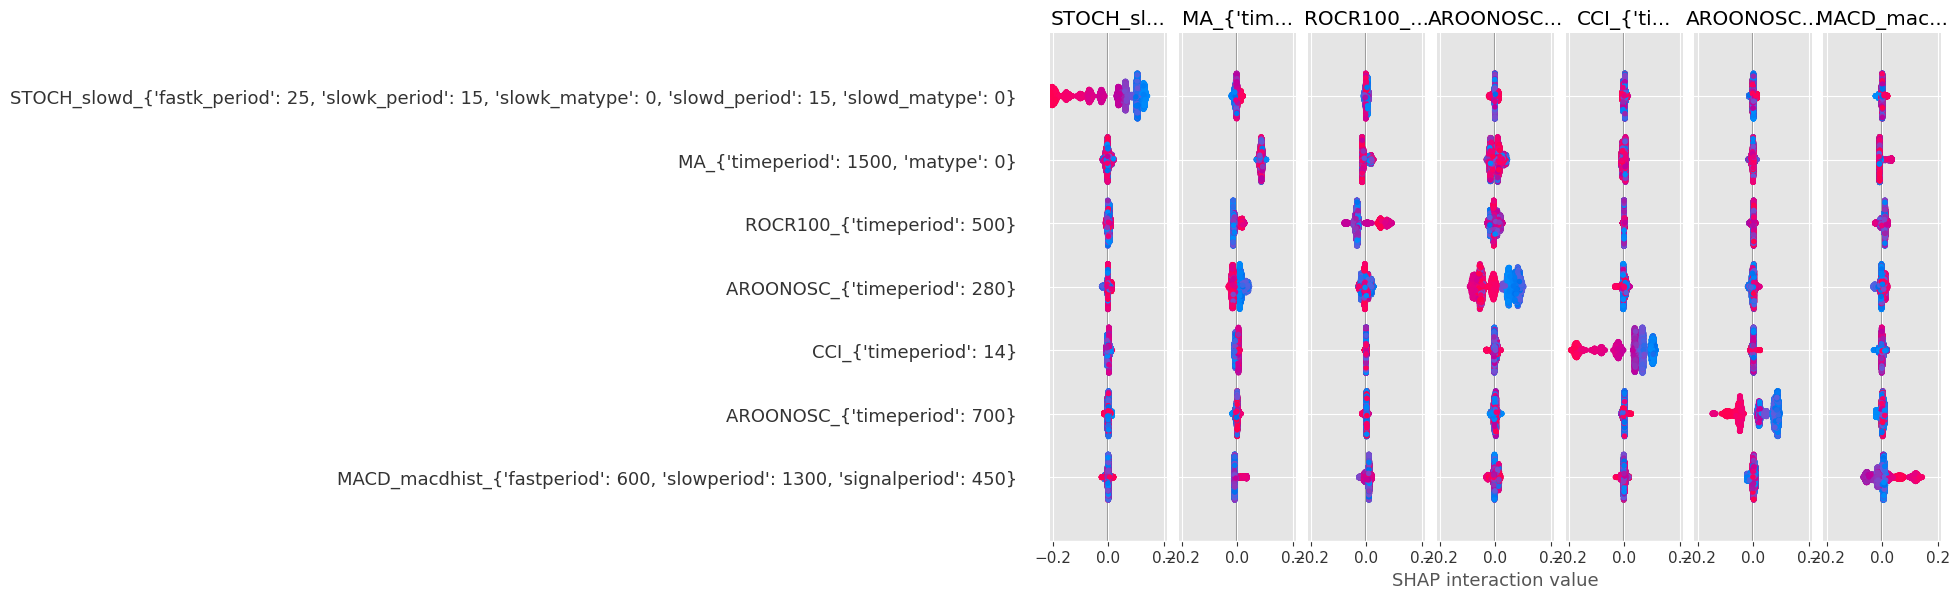

In [153]:
shap_interaction_values = explainer.shap_interaction_values(dataset_test[feature_names])
shap.summary_plot(shap_interaction_values, dataset_test[feature_names])#, max_display=4)
#shap.summary_plot(shap_interaction_values, boston_df[cols], max_display=4)

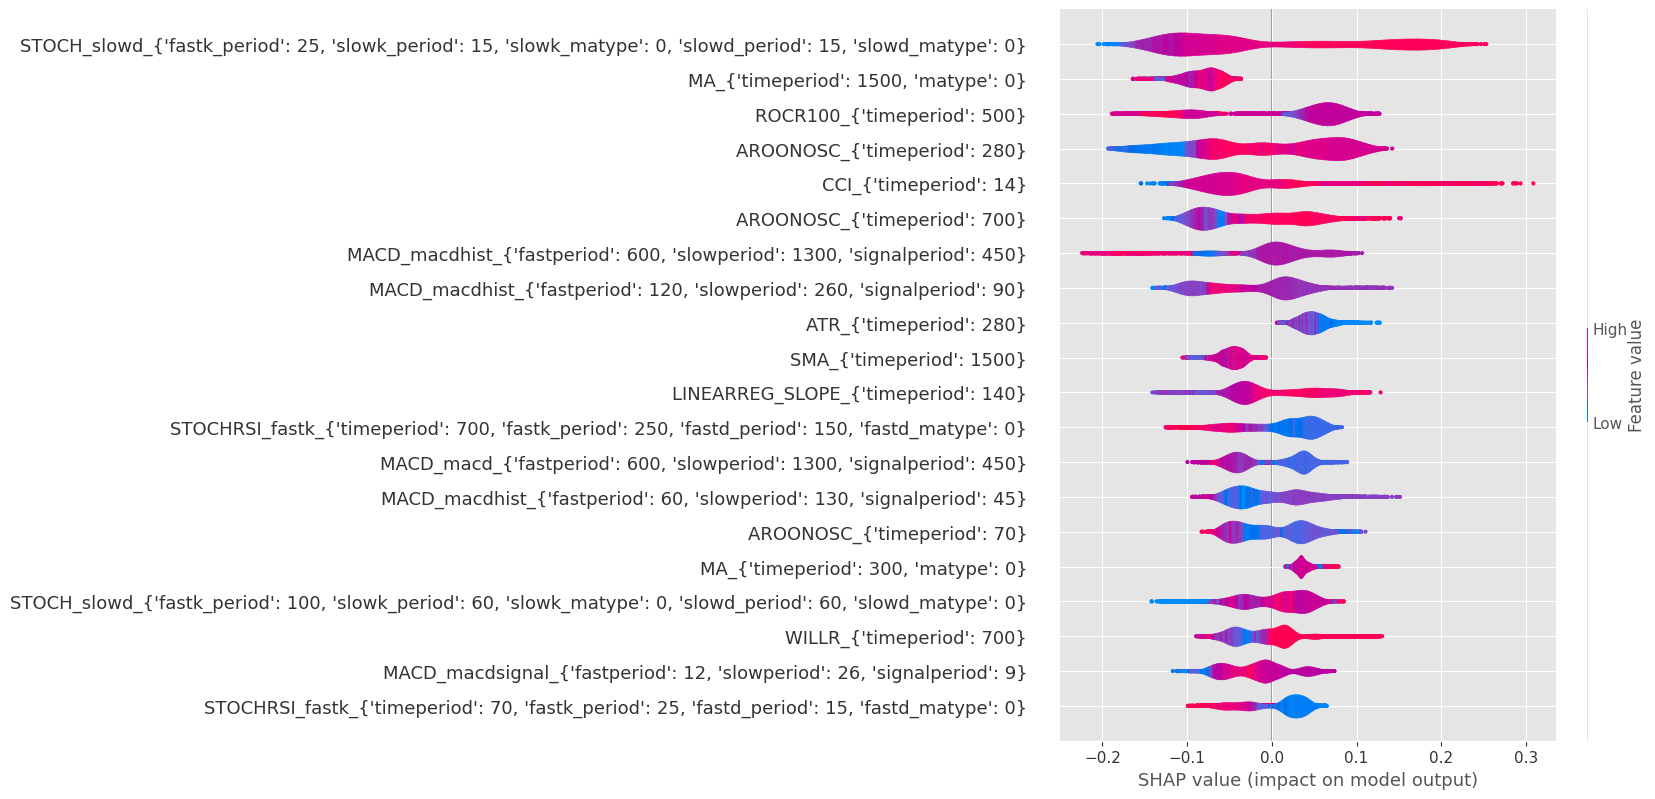

In [154]:
shap.summary_plot(shap_values, dataset_test[feature_names],plot_type='violin') #, max_display=4)
    #"dot" (default for single output), "bar" (default for multi-output), "violin",    or "compact_dot".    What type of summary plot to produce. Note that "compact_dot" is only used for    SHAP interaction values.


#shap.plots.beeswarm(shap_values, max_display=20)

In [155]:
#%matplotlib widget

## 傳統策略研發

In [156]:
def backtest(k1, k2, plot=False):
    
    k2, d2 = talib.STOCH(twii, twii, twii, fastk_period=k1, slowk_period=k2, slowd_period=k2/2)
    buy = k2 > d2
    sell = k2 < d2

    hold = pd.Series(np.nan, index=twii.index)
    hold[buy] = 1
    hold[sell] = -1
    hold.ffill(inplace=True)

    if (hold == 1).sum() == 0:
        return 1
    
    returns = twii.shift(-1) - twii
    
    if plot:
        
        returns[hold == 1][:'2015'].cumsum().plot()
    
    return returns[hold == 1][:'2015'].cumsum().iloc[-1]
   

maxr = 0
for k1 in range(40, 100, 1):
    for k2 in range(40, 100, 1):
        if k1 <= k2:
            continue
        r = backtest(k1, k2)
        if r > maxr:
            print(r, k1, k2)
            maxr = r

5100.990000000028 41 40
5169.2200000000175 42 41
5490.780000000027 45 44
5579.139999999983 48 46
5764.709999999992 48 47
5939.849999999988 49 46
6200.129999999991 49 47
7080.680000000016 49 48
7252.970000000013 50 48
7460.550000000011 50 49
7469.360000000006 51 49
7671.48 51 50
8251.830000000014 52 51
9400.670000000027 53 52
9590.00000000005 54 53
9652.460000000012 55 54
9834.380000000046 56 52
10205.06000000003 56 54
10235.449999999986 70 58
10846.449999999992 72 56
10876.719999999996 74 56
11356.480000000021 75 57
11467.660000000036 76 57
11547.580000000013 83 57
11702.410000000003 84 57


11547.580000000013

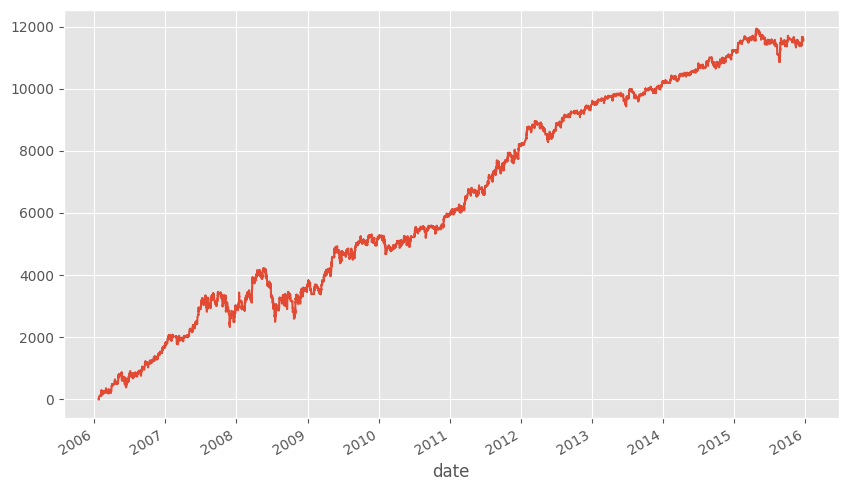

In [157]:
backtest(83, 57, True)